Q2. Perform the following preprocessing tasks on the dirty_iris datasetii.

i) Calculate the number and percentage of observations that are complete.

ii) Replace all the special values in data with NA.

iii) Define these rules in a separate text file and read them.
(Use editfile function in R (package editrules). Use similar function in Python).
Print the resulting constraint object.

– Species should be one of the following values: setosa, versicolor or virginica.

– All measured numerical properties of an iris should be positive.

– The petal length of an iris is at least 2 times its petal width.

– The sepal length of an iris cannot exceed 30 cm.

– The sepals of an iris are longer than its petals.

iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.

v) Find outliers in sepal length using boxplot and boxplot.stats

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('https://gist.githubusercontent.com/playgrdstar/bd409ebccfbce811eb879cc180763f37/raw/08db35b71e2cabc2ea353969da0204197851f778/iris_dirty.csv')
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [ ]:
complete_observation=df.dropna()
print('Count of complete observations :',len(complete_observation))
percentage_of_complete_observation=(len(complete_observation)/len(df))
print('Percentage of complete observations : ',percentage_of_complete_observation)

Count of complete observations : 131
Percentage of complete observations :  0.8733333333333333


In [ ]:
df.fillna('NA')

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NA,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


– Species should be one of the following values: setosa, versicolor or virginica.

– All measured numerical properties of an iris should be positive.

– The petal length of an iris is at least 2 times its petal width.

– The sepal length of an iris cannot exceed 30 cm.

– The sepals of an iris are longer than its petals.

In [ ]:
# Species should be one of the following values: setosa, versicolor or virginica.
df=df.assign(firstRule=lambda x:((x['Species']=='setosa')|(x['Species']=='versicolor')|(x['Species']=='virginica')))
# All measured numerical properties of an iris should be positive.
df=df.assign(secondRule=lambda x:((x['Sepal.Length']>0) & (x['Sepal.Width']>0) &(x['Petal.Length']>0) & (x['Petal.Width']>0)))
# The petal length of an iris is at least 2 times its petal width.
df=df.assign(thirdRule=lambda x:x['Petal.Length']>=2*x['Petal.Width'])
# The sepal length of an iris cannot exceed 30 cm.
df=df.assign(fourthRule=lambda x:x['Sepal.Length']<=30)
# The sepals of an iris are longer than its petals.
df=df.assign(fifthRule=lambda x:x['Sepal.Length']>x['Petal.Length'])




In [ ]:
# changing bool values to int
df['firstRule']=df['firstRule'].astype(int)
df['secondRule']=df['secondRule'].astype(int)
df['thirdRule']=df['thirdRule'].astype(int)
df['fourthRule']=df['fourthRule'].astype(int)
df['fifthRule']=df['fifthRule'].astype(int)
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,firstRule,secondRule,thirdRule,fourthRule,fifthRule
0,1,5.1,3.5,1.4,0.2,Setosa,0,1,1,1,1
1,2,4.9,3.0,1.4,0.2,setosa,1,1,1,1,1
2,3,4.7,3.2,1.3,0.2,setosa,1,1,1,1,1
3,4,4.6,3.1,1.5,0.2,setosa,1,1,1,1,1
4,5,NaN,3.6,1.4,0.2,setosa,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,1,1,1,1,1
146,147,6.3,2.5,5.0,1.9,virginica,1,1,1,1,1
147,148,6.5,3.0,5.2,2.0,virginica,1,1,1,1,1
148,149,6.2,3.4,5.4,2.3,virginica,1,1,1,1,1


In [ ]:
df_after_rules=df[['firstRule','secondRule','thirdRule','fourthRule','fifthRule']]
df_after_rules

,firstRule,secondRule,thirdRule,fourthRule,fifthRule
0,0,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,0,1,0,0
...,...,...,...,...,...
145,1,1,1,1,1
146,1,1,1,1,1
147,1,1,1,1,1
148,1,1,1,1,1


In [ ]:
# Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.

df_after_rules.describe()

,firstRule,secondRule,thirdRule,fourthRule,fifthRule
count,150.000000,150.000000,150.0,150.000000,150.000000
mean,0.966667,0.873333,1.0,0.946667,0.946667
std,0.180107,0.333713,0.0,0.225450,0.225450
min,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.000000,1.000000,1.0,1.000000,1.000000
50%,1.000000,1.000000,1.0,1.000000,1.000000
75%,1.000000,1.000000,1.0,1.000000,1.000000
max,1.000000,1.000000,1.0,1.000000,1.000000


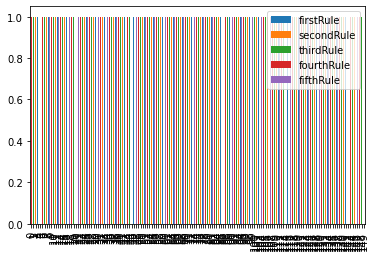

In [ ]:
df_after_rules.plot(y=['firstRule','secondRule','thirdRule','fourthRule','fifthRule'],kind='bar')
plt.show()

In [ ]:
# Find outliers in sepal length using boxplot and boxplot.stats

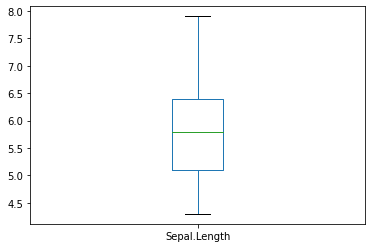

In [ ]:
df.boxplot(column =['Sepal.Length'], grid = False)